In [1]:
import numpy as np
import torch

from train import TrainerDAGMM
from test import eval
from preprocess import get_KDDCup99

In [5]:
class Args:
    num_epochs=200
    patience=50
    lr=1e-4
    lr_milestones=[50]
    batch_size=1024
    latent_dim=1
    n_gmm=4
    lambda_energy=0.1
    lambda_cov=0.005
    
    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = get_KDDCup99(args)

dagmm = TrainerDAGMM(args, data, device)
dagmm.train()

  1024/198371: [>...............................] - ETA 0.0s

/home/ec2-user/PyTorch-DAGMM/forward_step.py:79: UserWarning: torch.potrf is deprecated in favour of torch.cholesky and will be removed in the next release. Please use torch.cholesky instead and note that the :attr:`upper` argument in torch.cholesky defaults to ``False``.
  l = torch.potrf(a, False)


198371/198371: [===============================>] - ETA 1.5sss
Training DAGMM... Epoch: 0, Loss: 468.669
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 1, Loss: 468.159
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 2, Loss: 468.113
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 3, Loss: 468.272
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 4, Loss: 468.354
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 5, Loss: 468.405
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 6, Loss: 468.411
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 7, Loss: 468.272
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 8, Loss: 468.076
198371/198371: [===============================>] - ETA 0.0s
Training D

198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 79, Loss: 468.549
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 80, Loss: 468.255
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 81, Loss: 468.694
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 82, Loss: 468.468
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 83, Loss: 468.266
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 84, Loss: 468.694
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 85, Loss: 468.691
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 86, Loss: 468.050
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 87, Loss: 468.381
198371/198371: [===============================>] - ETA 0.0s
Tra

198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 157, Loss: 468.324
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 158, Loss: 468.759
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 159, Loss: 468.145
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 160, Loss: 467.670
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 161, Loss: 468.546
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 162, Loss: 468.632
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 163, Loss: 468.263
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 164, Loss: 468.282
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 165, Loss: 468.636
198371/198371: [===============================>] - ETA

In [6]:
from test import eval

labels, scores = eval(dagmm.model, data, device, args.n_gmm)

Testing...


/home/ec2-user/PyTorch-DAGMM/forward_step.py:79: UserWarning: torch.potrf is deprecated in favour of torch.cholesky and will be removed in the next release. Please use torch.cholesky instead and note that the :attr:`upper` argument in torch.cholesky defaults to ``False``.
  l = torch.potrf(a, False)


Precision : 0.9595, Recall : 0.9359, F-score : 0.9476
ROC AUC score: 0.989


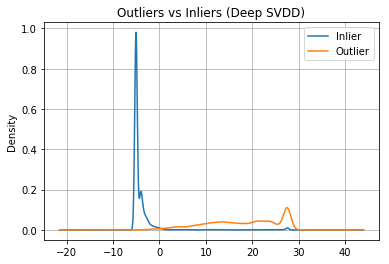

In [8]:
import matplotlib.pyplot as plt
import pandas as pd 

scores_in = scores[np.where(labels==0)[0]]
scores_out = scores[np.where(labels==1)[0]]


in_ = pd.DataFrame(scores_in, columns=['Inlier'])
out_ = pd.DataFrame(scores_out, columns=['Outlier'])


fig, ax = plt.subplots()
in_.plot.kde(ax=ax, legend=True, title='Outliers vs Inliers (Deep SVDD)')
out_.plot.kde(ax=ax, legend=True)
ax.grid(axis='x')
ax.grid(axis='y')
plt.show()